In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import animation
from salishsea_tools.nc_tools import scDataset
from matplotlib import ticker
from matplotlib import colors
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions
import quicklook

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

/home/imachuca/anaconda3/envs/gsw/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


https://blog.graphiq.com/finding-the-right-color-palettes-for-data-visualizations-fcd4e707a283

In [8]:
x_start = 200
x_end = 230
y_start = 45
y_end = 190
dep_start = 2
dep_end = 6 #changed from 5 in shelf_currents.ipynb

fname = "1_MCKNZ_1h_20170101_201701*"
meshmaskname = '1_mesh_mask.nc'
flag = 'U'

dirname='/ocean/imachuca/Canyons/results_mackenzie/extended_domain/ideal_half/'
vozocrtx_h, umask_h, umask_all_h, depthu_h, e1u, e2u, sozotaux_h = quicklook.get_vars_for_box(dirname, fname, meshmaskname, x_start, x_end, y_start, y_end, flag)

dirname='/ocean/imachuca/Canyons/results_mackenzie/extended_domain/ideal_base/'
vozocrtx_b, umask_b, umask_all_b, depthu_b, e1u, e2u, sozotaux_b = quicklook.get_vars_for_box(dirname, fname, meshmaskname, x_start, x_end, y_start, y_end, flag)

dirname='/ocean/imachuca/Canyons/results_mackenzie/extended_domain/ideal_double/'
vozocrtx_d, umask_d, umask_all_d, depthu_d, e1u, e2u, sozotaux_d = quicklook.get_vars_for_box(dirname, fname, meshmaskname, x_start, x_end, y_start, y_end, flag)

In [26]:
votemper = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/conditions/NEMO_files/temperature/temperature_for_agrif.nc')['votemper'][0, :, 0, 0]
vosaline = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/conditions/NEMO_files/salinity/salinity_for_agrif.nc')['vosaline'][0, :, 0, 0]

In [33]:
filesT = general_functions.get_files(dirname, fname, 'grid_T')
with scDataset(filesT) as dsT:
    deptht = dsT.variables['deptht'][:]

In [52]:
plt.style.available

['seaborn-bright',
 'seaborn-deep',
 'fast',
 'seaborn-ticks',
 'seaborn-notebook',
 'seaborn-poster',
 'Solarize_Light2',
 'seaborn-talk',
 'seaborn',
 'dark_background',
 'seaborn-dark-palette',
 'seaborn-colorblind',
 'seaborn-pastel',
 'classic',
 'tableau-colorblind10',
 'seaborn-darkgrid',
 '_classic_test',
 'seaborn-paper',
 'seaborn-muted',
 'seaborn-dark',
 'seaborn-whitegrid',
 'ggplot',
 'bmh',
 'grayscale',
 'seaborn-white',
 'fivethirtyeight']

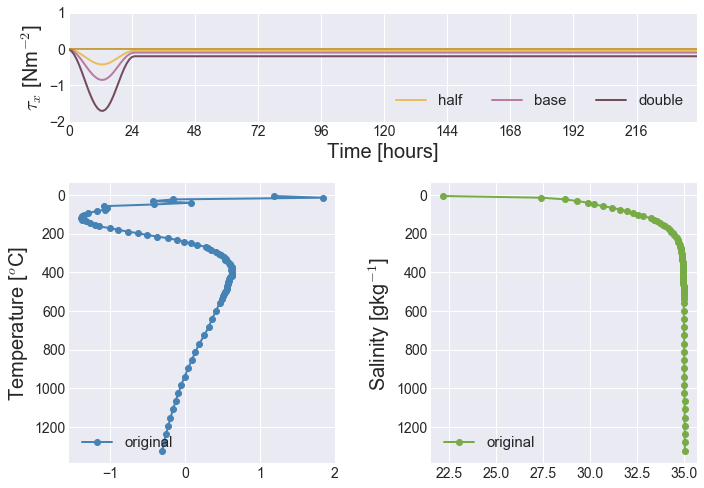

In [84]:
fig = plt.figure(figsize=(10, 7))
ax0 = plt.subplot2grid((3, 2), (0, 0), colspan=2, rowspan=1)
ax1 = plt.subplot2grid((3, 2), (1, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 2), (1, 1), rowspan=2)
plt.style.use('seaborn-darkgrid')

ax0.plot(sozotaux_h, c='#EABE5D', lw=2, label='half')
ax0.plot(sozotaux_b, c='#BA7BA1', lw=2, label='base')
ax0.plot(sozotaux_d, c='#734B5E', lw=2, label='double')
ax0.legend(loc=4, ncol=3, fontsize=15)
ax0.set_xlabel('Time [hours]', fontsize=20)
ax0.set_ylabel(r'$\tau_x$ [Nm$^{-2}$]', fontsize=20)
ax0.set_ylim([-2.0, 1.0])
ax0.set_xlim([0, 10*24-1])
ax0.xaxis.set_ticks(np.arange(0, 10*24, 24))
#ax0.grid()
ax0.axhline(0, linestyle='-', c='darkgoldenrod', linewidth=1.5)

ax1.plot(votemper, deptht, c='steelblue', lw=2, marker ='o', linestyle='-', label='original')
ax2.plot(vosaline, deptht, c='#78AB46', lw=2, marker ='o', linestyle='-', label='original')
for ax, ttl, n in zip([ax1, ax2], ['Temperature [$^o$C]', 'Salinity [gkg$^{-1}$]'], np.arange(2)):
    
    ax.invert_yaxis()
    ax.set_ylabel(ttl, fontsize=20)
    ax.legend(loc=3, fontsize=15)

fig.patch.set_facecolor('white')

fig.tight_layout(w_pad=2.0, h_pad=1.5)

fig.savefig('./wind_temp_salt.png', dpi=200, bbox_inches='tight', format='png', facecolor=fig.get_facecolor())